##Exploratory Data Analysis of Student Performance in Exam
----
###kaggle
https://www.kaggle.com/datasets/spscientist/students-performance-in-exams

###github
https://github.com/iamthanendra/Exploratory-Data-Analysis

----

In [66]:
#Importing necesaary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
files.upload()

import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.simplefilter("ignore", category=FutureWarning)

Saving StudentsPerformance.csv to StudentsPerformance.csv


In [67]:
#Reading our csv file
data = pd.read_csv("StudentsPerformance.csv")

In [68]:
#Printing 5 rows from top
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
#Printing 5 rows from bottom
data.tail()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77
999,female,group D,some college,free/reduced,none,77,86,86


In [70]:
#Checking shape of our dataset
data.shape

(1000, 8)

In [71]:
#Descriptive Analysis
data.describe().T

,count,mean,std,min,25%,50%,75%,max
math score,1000.0,66.089,15.163080,0.0,57.00,66.0,77.0,100.0
reading score,1000.0,69.169,14.600192,17.0,59.00,70.0,79.0,100.0
writing score,1000.0,68.054,15.195657,10.0,57.75,69.0,79.0,100.0


In [72]:
#Counting Unique Value
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [73]:
#Printing Column Name
data.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

###If Student get Less than 0 and Greater than 100 mean those can be outlier

In [74]:
#Printing minimum and maximum value
print(data["math score"].min())
print(data["math score"].max())

0
100


In [75]:
#Printing minimum and maximum value
print(data["reading score"].min())
print(data["reading score"].max())

17
100


In [76]:
#Printing minimum and maximum value
print(data["writing score"].min())
print(data["writing score"].max())

10
100


In [77]:
#Renaming dataset column to replace ' '(space) to _(underscore)
data.rename(columns={"parental level of education": "parental_level_of_education" , 
                     "writing score":"writing_score", 
                     "reading score": "reading_score", 
                     "math score":"math_score", 
                     "test preparation course": "test_preparation_course"}, 
            inplace=True)

In [78]:
#Creating Total value which will contains average of writing_score, reading_score, and math_score
data["Total score"] = ( data["writing_score"] + data["reading_score"] + data["math_score"] ) / 3

print(data["Total score"].min())
print(data["Total score"].max())

9.0
100.0


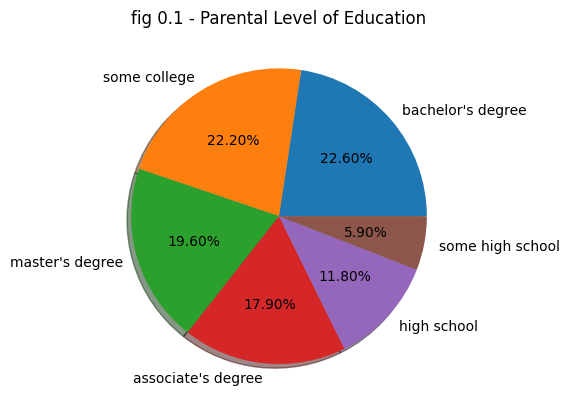

In [79]:
# Create a pie chart of student's parental level of education
plt.pie(data["parental_level_of_education"].value_counts(), labels=data["parental_level_of_education"].unique(), shadow=True, autopct="%.2f%%")
plt.title("fig 0.1 - Parental Level of Education")
plt.show()

from given pie chart we understand only 5% student's parents are studies less than high school


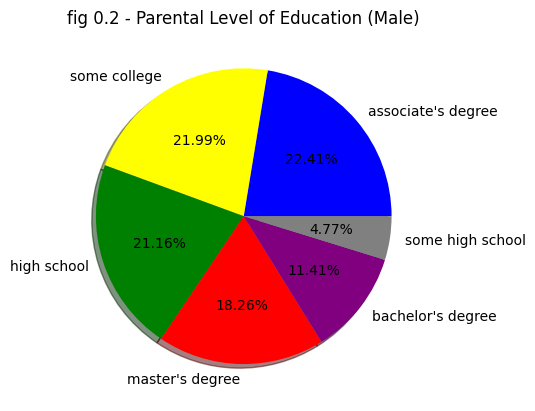

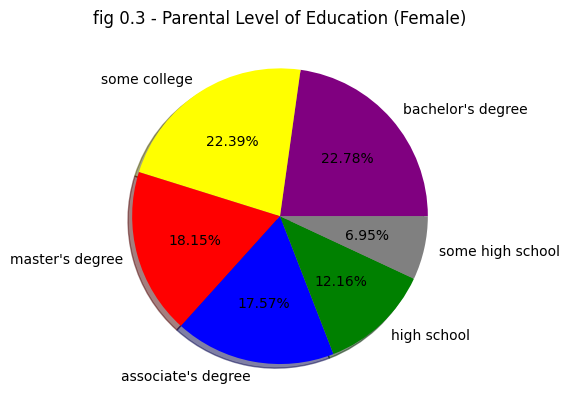

In [80]:
# Create a pie chart of student's parental level of education (boys and girls seperate)
male = data.query("gender=='male'")
male["parental_level_of_education"]

female = data.query("gender=='female'")
female["parental_level_of_education"]

c1 = ["blue", "yellow", "green", "red", "purple", "grey"]
c2 = ["purple", "yellow", "red", "blue", "green", "grey"]

plt.pie(male["parental_level_of_education"].value_counts(), labels=male["parental_level_of_education"].unique(), autopct="%.2f%%", shadow=True, colors=c1)
plt.title("fig 0.2 - Parental Level of Education (Male)")
plt.show()

plt.pie(female["parental_level_of_education"].value_counts(), labels=female["parental_level_of_education"].unique(), autopct="%.2f%%", shadow=True, colors=c2)
plt.title("fig 0.3 - Parental Level of Education (Female)")

plt.show()

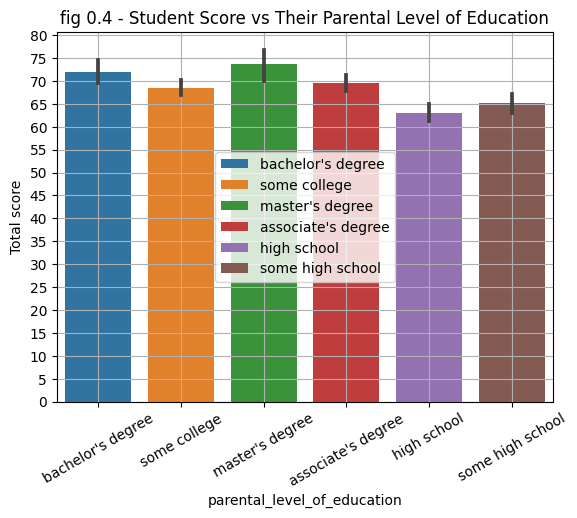

In [81]:
#Ploting Total Value of student with comparing their parental level of education

sns.barplot(x=data["parental_level_of_education"],y=data["Total score"], label=list(data["parental_level_of_education"].unique()))
plt.xticks(label=list(data["parental_level_of_education"].unique()), rotation=30)
plt.title("fig 0.4 - Student Score vs Their Parental Level of Education")
plt.yticks(list(range(0, 85, 5)))
plt.legend(loc='center')
plt.grid()
plt.show()

From given plot we reach at this conclusion that student whose parents get low level of education can score atleast 60 % marks
and  student (parents with Master's degree ) can score the highest

In [82]:
#Calculating how many student completed course or not
test_preparation_course = data.loc[:,"test_preparation_course"]

print(test_preparation_course.unique())

completed_course = len(list(filter(lambda x: x == 'completed', test_preparation_course)))
not_completed_course = len(list(filter(lambda x: x == 'none', test_preparation_course)))

print(not_completed_course, completed_course)

course_lbl = ['not completed', 'completed']
course_value = [not_completed_course, completed_course]

['none' 'completed']
642 358


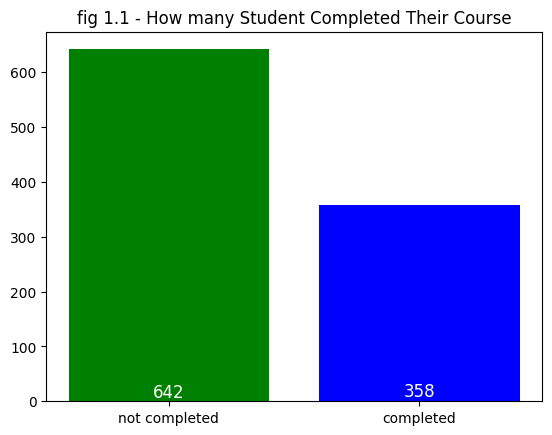

In [83]:
#Ploting how many student completed course or not
plt.bar(course_lbl, course_value, color=['g', 'b'])
plt.text(0, plt.gca().get_xticks()[0], course_value[0], ha="center", va="bottom", color="white", fontsize="large")
plt.text(1, plt.gca().get_xticks()[1], course_value[1], ha="center", va="bottom", color="white", fontsize="large")
plt.title("fig 1.1 - How many Student Completed Their Course")
plt.show()

642 student haven't completed their course and 358 student completed their course

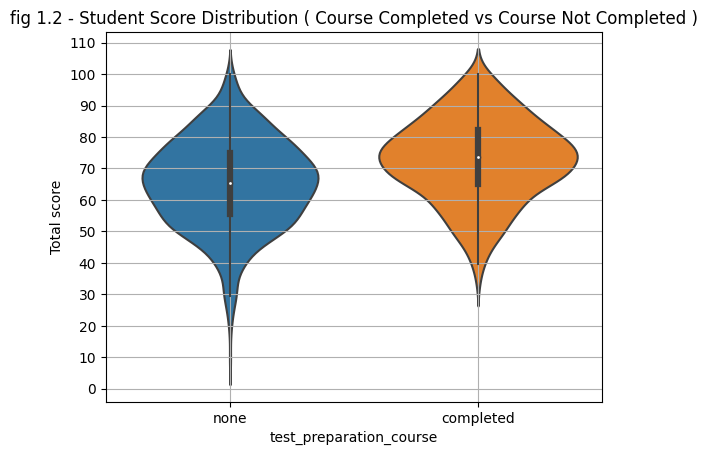

In [84]:
#Score Distribution between student who completed course or who havn't
ax = sns.violinplot(x=data["test_preparation_course"], y=data["Total score"])
plt.title("fig 1.2 - Student Score Distribution ( Course Completed vs Course Not Completed )")
plt.grid()
plt.yticks(list(range(0,120,10)))
plt.show()

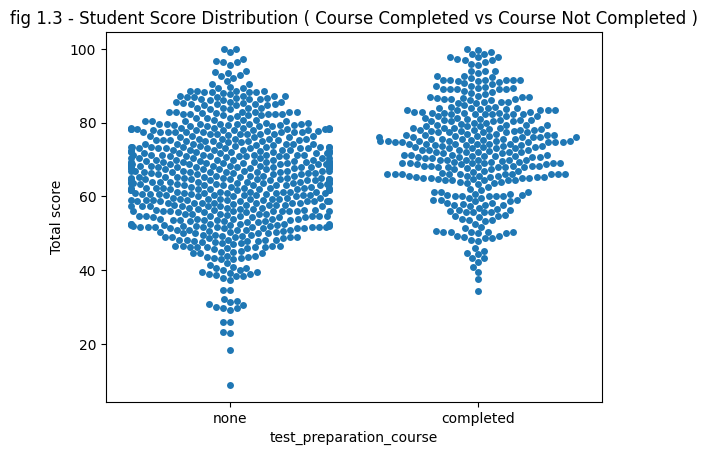

In [85]:
#Score Distribution between student who completed course or who havn't
sns.swarmplot(x=data["test_preparation_course"], y=data["Total score"])
plt.title("fig 1.3 - Student Score Distribution ( Course Completed vs Course Not Completed )")
plt.show()

from given violin plot and swarm plot we understand that student who havn't completed course are getting average score between 40 to 80 , and some of them are also getting less than 40 marks, in other hand student who completed course are getting average 60-80, and none of them are scoring less than 40 or 35

In [86]:
#Cleaning the Dataset

In [87]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
Total score                    0
dtype: int64

In [88]:
# data.drop(['race/ethnicity'], axis=1)
data.head()

,gender,race/ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,Total score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [89]:
#Finding correlation between variable
corelation = data.corr()
print(corelation)


               math_score  reading_score  writing_score  Total score
math_score       1.000000       0.817580       0.802642     0.918746
reading_score    0.817580       1.000000       0.954598     0.970331
writing_score    0.802642       0.954598       1.000000     0.965667
Total score      0.918746       0.970331       0.965667     1.000000


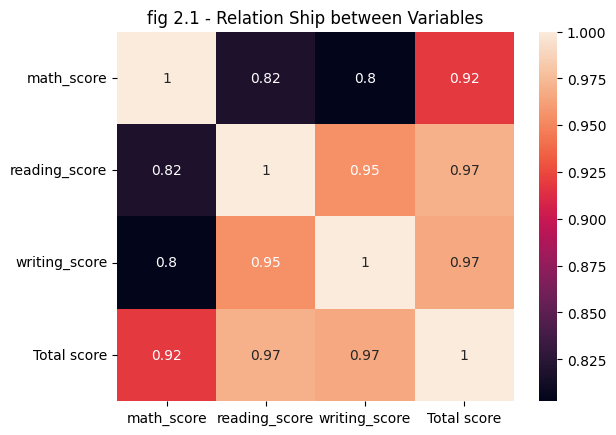

In [90]:
#relationship Analysis

sns.heatmap(corelation, xticklabels = corelation.columns, yticklabels=corelation.columns, annot=True)
plt.title("fig 2.1 - Relation Ship between Variables")
plt.show()

From Given Heatmap we understand that writing_score aur reading_score are highely interconnected

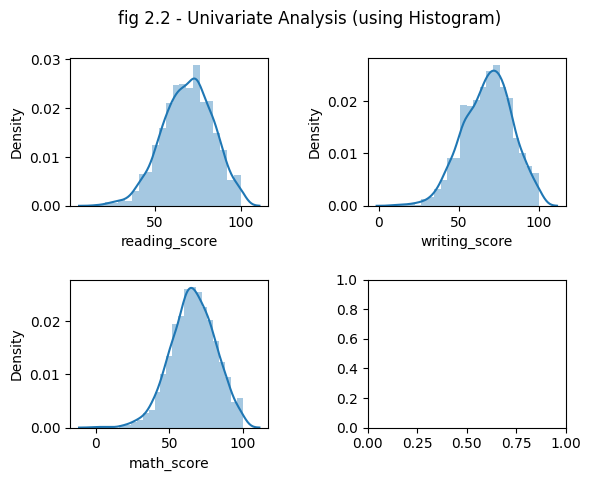

In [91]:
#Univariate Analysis

fig, axes = plt.subplots(nrows=2, ncols=2)
sns.distplot(data["reading_score"],  kde=True, ax=axes[0,0])
sns.distplot(data["writing_score"],  kde=True, ax=axes[0,1])
sns.distplot(data["math_score"],  kde=True, ax=axes[1,0])

plt.subplots_adjust(wspace=0.5, hspace=0.5)

plt.suptitle("fig 2.2 - Univariate Analysis (using Histogram)")
plt.show()

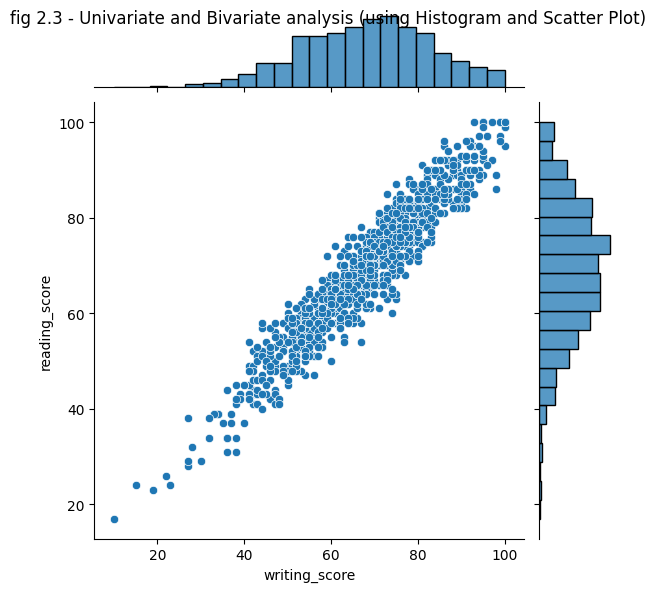

In [92]:
#Univariate and Bivariate analysis

sns.jointplot(x=data["writing_score"], y=data["reading_score"])
plt.suptitle("fig 2.3 - Univariate and Bivariate analysis (using Histogram and Scatter Plot)")
plt.show()

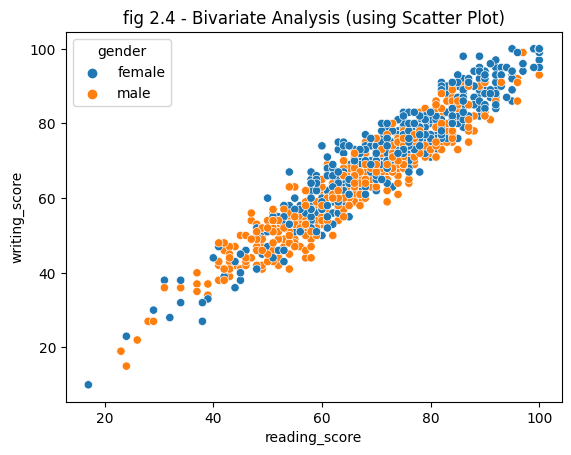

In [93]:
#Bivariate analysis
sns.scatterplot(x=data["reading_score"], y=data["writing_score"], hue=data["gender"])
plt.title("fig 2.4 - Bivariate Analysis (using Scatter Plot)")
plt.show()

By Univariate and Bivariate Analysis we understand that if student score low in reading score then he also score low in writing score, if he score high in reading score then he also score high in writing score

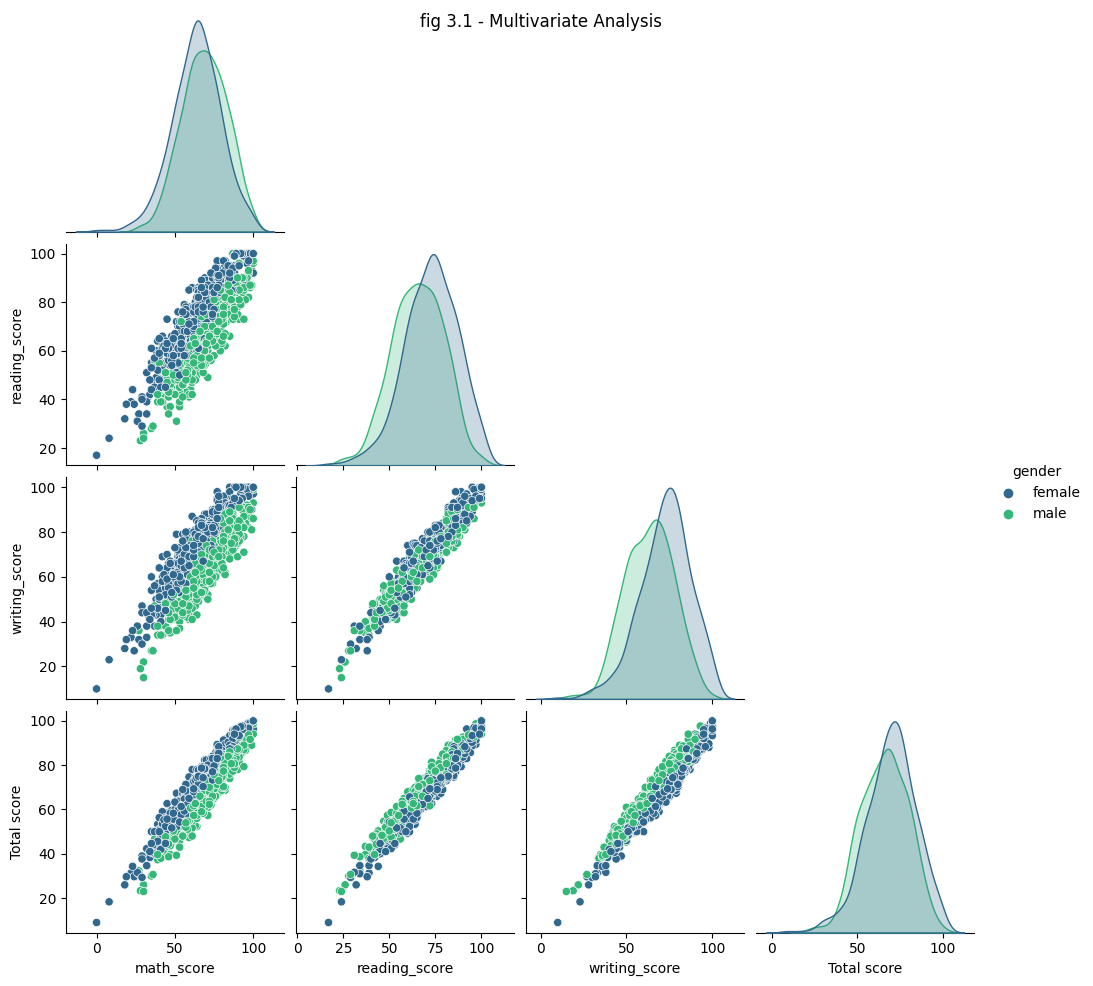

In [94]:
#Multivariate Analysis
sns.pairplot(data, corner=True, palette='viridis', hue="gender")
plt.suptitle("fig 3.1 - Multivariate Analysis")
plt.show()

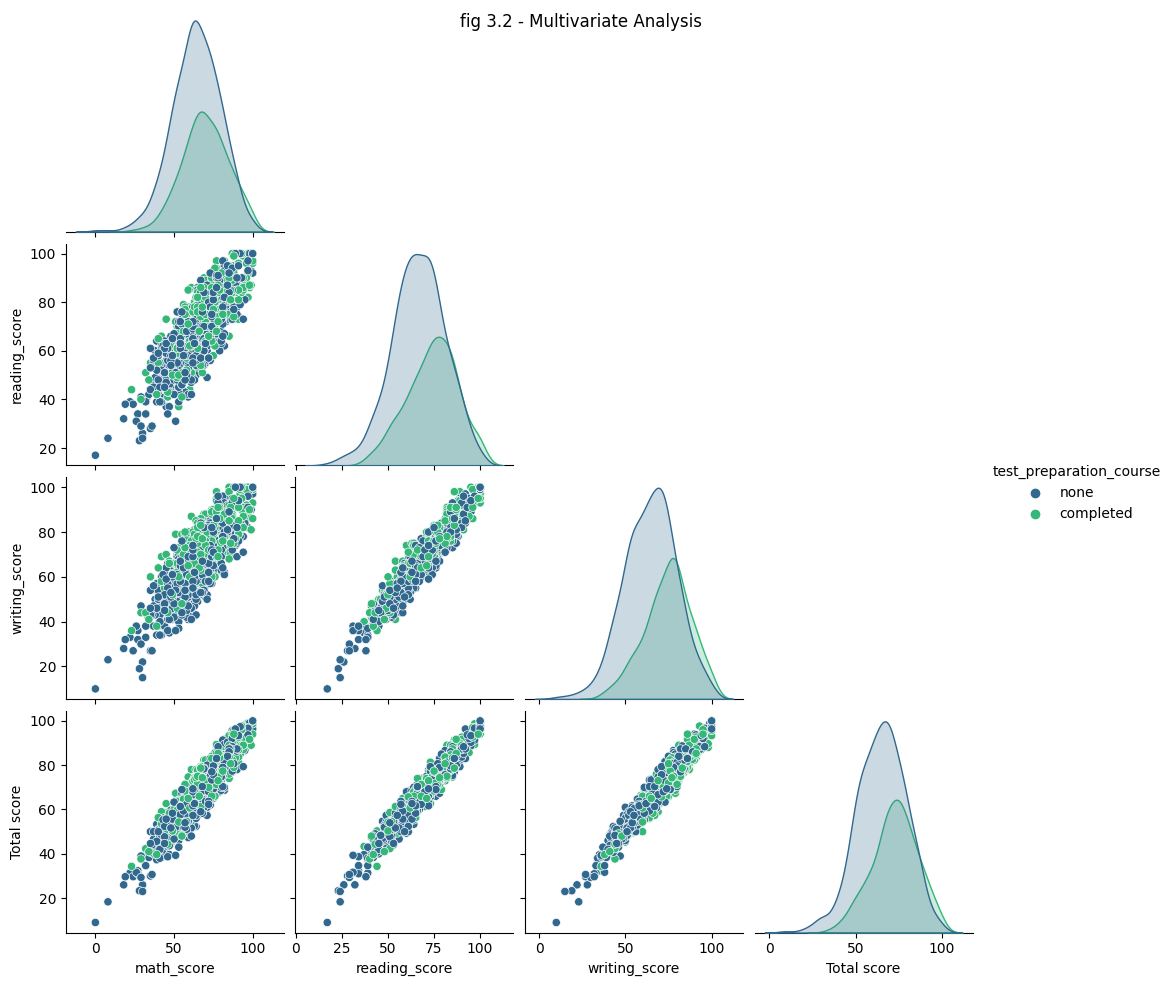

In [95]:
#Multivariate Analysis
sns.pairplot(data, corner=True, palette='viridis', hue="test_preparation_course")
plt.suptitle("fig 3.2 - Multivariate Analysis")
plt.show()

Master's degrees are typically considered to be the highest level of undergraduate education. They typically require two years of full-time study beyond a bachelor's degree. Bachelor's degrees are the most common type of undergraduate degree. They typically require four years of full-time study. Associate degrees are two-year degrees that are typically awarded by community colleges. Some college refers to any post-secondary education that is less than a bachelor's degree. High school is the final level of compulsory education in most countries. Some high school refers to any education that is less than a high school diploma.

It is important to note that the priority of educational levels may vary depending on the specific field of study and the job market. For example, in some fields, a master's degree may be required for entry-level positions, while in other fields, a bachelor's degree may be sufficient. Additionally, the job market may vary depending on the location. For example, in some areas, there may be more jobs available for people with a master's degree, while in other areas, there may be more jobs available for people with a bachelor's degree.


Master Degree > Bachelor Degree > Associate Degree > Some College > High School > Some High School

# Conclusion


*   fig 0.1 in given pie chart indicate that 
   * 22.20 % of parent completed their master degree rest 80.4 % never completed their Master Degree,
   * 22.60 % parent completed their Bachelor's Degree rest 57.8 % parent never completed their Bachelor's Degree,
   * 17.90 % parent completed their Associate's Degree rest 39.90 % parent never completed their Associate's Degree,
   * 22.20 % parent completed their College rest 17.70 % parent never completed their College,
   * 11.80 % parent completed their High School rest 5.90 % parent never completed their High School,
*  fig 0.2 in given pie chart indicate that
   * 52.08 % boys parent's completed any degree (Master Degree, Bachelor's Degree, Associate Degree)
*  fig 0.3 in given pie chart indicate that
   * 58.80 % girls parent's completed any degree (Master Degree, Bachelor's Degree, Associate Degree)
*  fig 0.4 in given bar graph indicate that
   * Students who's Parents are completed Master Degree are scoring more than 70 marks
   * Students who's Parents are completed Bachelor's Degree are scoring more than 70 marks
   * Students who's Parents are completed Associate Degree are scoring more than 65 marks
   * Students who's Parents are completed College are scoring more than 65 marks
   * Students who's Parents are completed High School are scoring more than 60 marks
   * Students who's Parents are studies till High school are scoring 60-65 marks

Means many of time parents eduction level affects child many times not

---

* from fig 1.1, we understand that more than 60 % student haven't completed their course (358 student completed course and 642 student not completed their course)
* fig 1.2 and 1.3 indicate that student who are completed their course are scoring between 85 to 75 and student who ain't completed their course are scoring between 75 to 65

---

* from fig 2.1, we found that reading_score and writing_score are highely connected
* from fig 2.2, we found that reading_score, writing_score and math_score maximum marks distribution between 50 to 100
* from fig 2.3 & 2.4, we understand that if student score low in reading score then he also score low in writing score, if he score high in reading score then he also score high in writing score or vice verse

* fig 3.1, 3.2 are showing Multivariate Analysis

##About Dataset
###Context
Marks secured by the students

###Content
This data set consists of the marks secured by the students in various subjects.

###Acknowledgements
http://roycekimmons.com/tools/generated_data/exams

###Inspiration
To understand the influence of the parents background, test preparation etc on students performance